In [1]:
print("Loading Libraries...")
import os, sys
import csv
import platform
import numpy as np
import pandas as pd
import dask.dataframe as dd
import scipy
import sklearn
import matplotlib.pyplot as plt
import flask
import math
import scipy.interpolate as scin
import matplotlib.colors as colors
from matplotlib import cm
from matplotlib.ticker import LinearLocator
from matplotlib.ticker import MaxNLocator
from matplotlib.colors import ListedColormap
from matplotlib.colors import BoundaryNorm
from matplotlib.colors import LogNorm
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata
from sklearn import neighbors, datasets
print("Loaded Libraries...")

Loading Libraries...
Loaded Libraries...


In [2]:
#Local
print("Loading directories..")
path_coords = 'C:/Users/JMosiezny/Documents/01_PUT/01_DOKTORAT/15_results/coords'
path_rms = 'C:/Users/JMosiezny/Documents/01_PUT/01_DOKTORAT/15_results/rms'
print("Loaded directories...")

Loading directories..
Loaded directories...


In [3]:
os.chdir(path_coords)
coordlist = os.listdir(path_coords)
os.chdir(path_rms)
rmslist = os.listdir(path_rms)

In [4]:
coordlist

['int-01_coords.dat',
 'int-02_coords.dat',
 'int-03_coords.dat',
 'int-04_coords.dat',
 'int-05_coords.dat',
 'int-06_coords.dat',
 'int-07_coords.dat',
 'int-08_coords.dat',
 'int-09_coords.dat',
 'int-10_coords.dat',
 'int-11_coords.dat',
 'int-12_coords.dat',
 'int-tip_coords.dat',
 'lead_coords.dat',
 'pside__coords.dat',
 'sside__coords.dat',
 'tip_coords.dat',
 'trail_coords.dat']

In [5]:
rmslist

['int-01-rms.dat',
 'int-02-rms.dat',
 'int-03-rms.dat',
 'int-04-rms.dat',
 'int-05-rms.dat',
 'int-06-rms.dat',
 'int-07-rms.dat',
 'int-08-rms.dat',
 'int-09-rms.dat',
 'int-10-rms.dat',
 'int-11-rms.dat',
 'int-12-rms.dat',
 'int-tip-rms.dat',
 'lead-rms.dat',
 'pside-rms.dat',
 'sside-rms.dat',
 'tip-rms.dat',
 'trail-rms.dat']

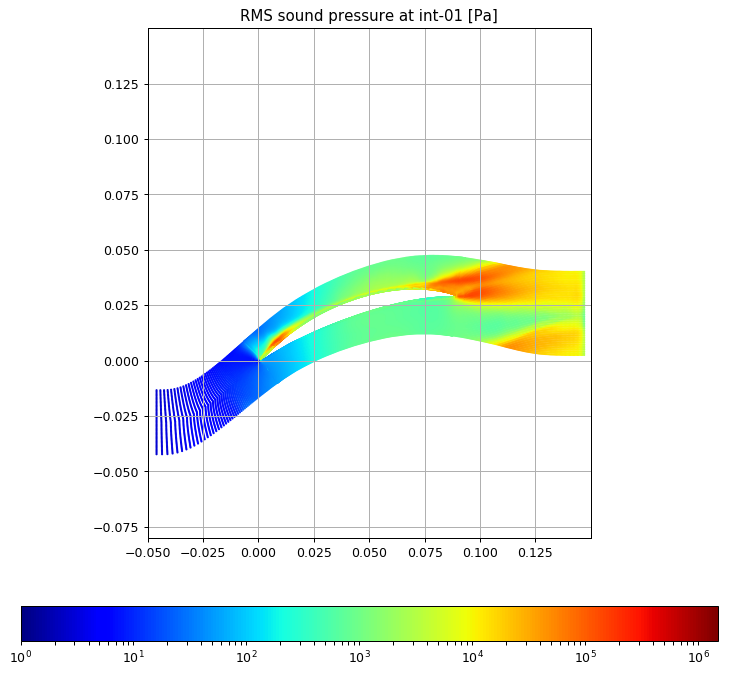

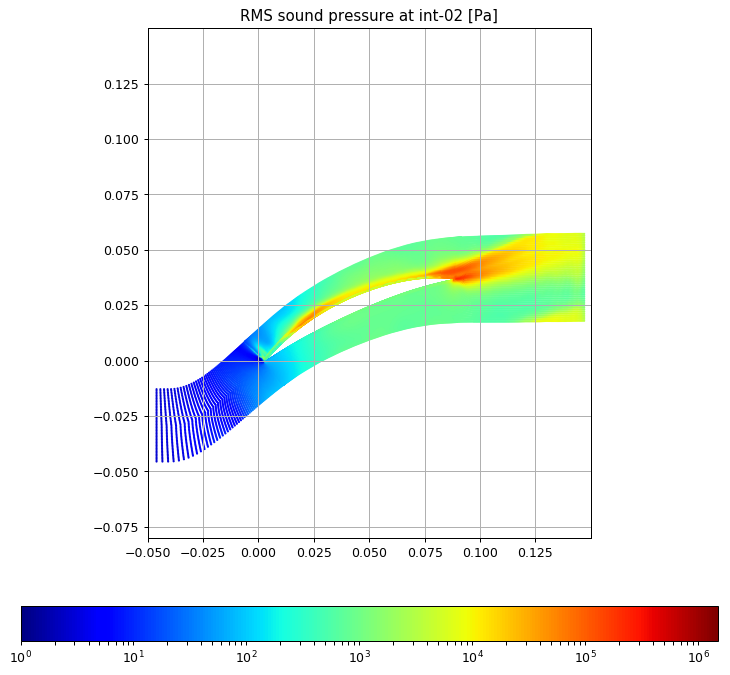

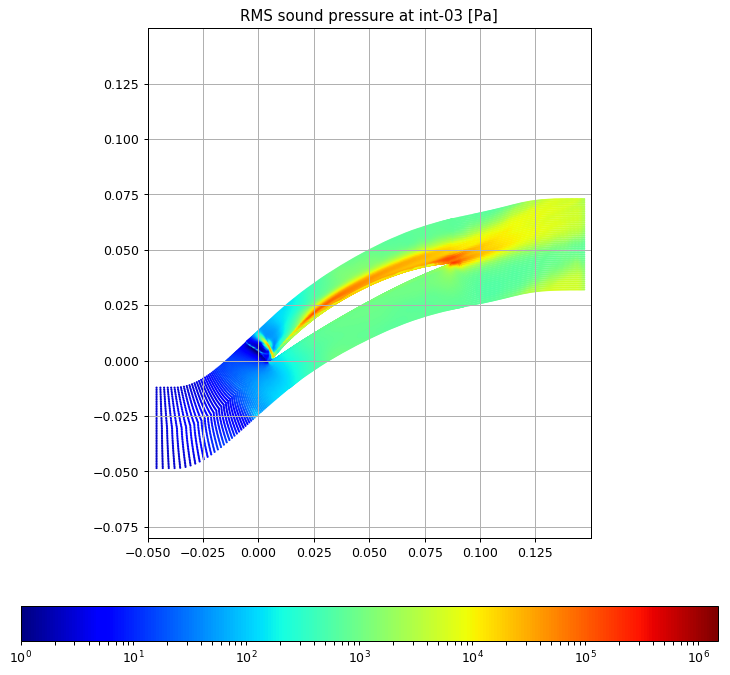

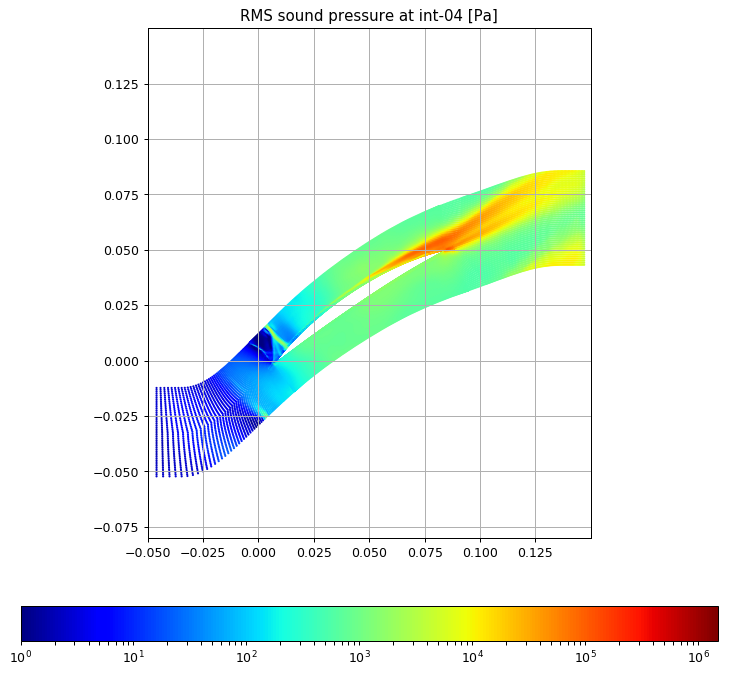

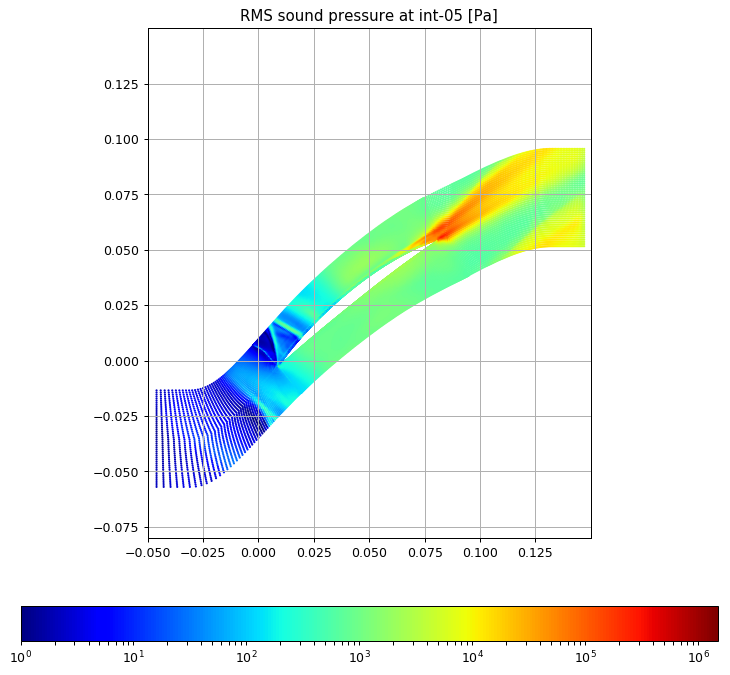

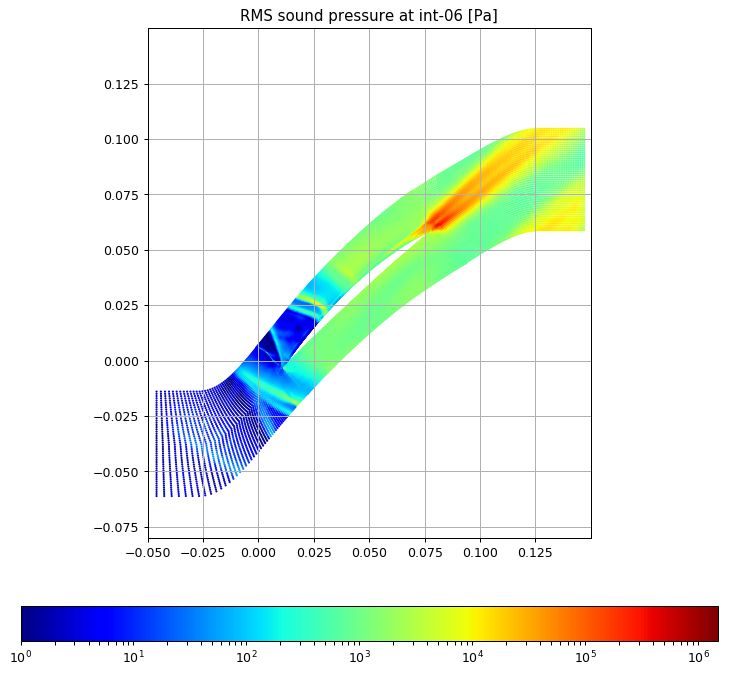

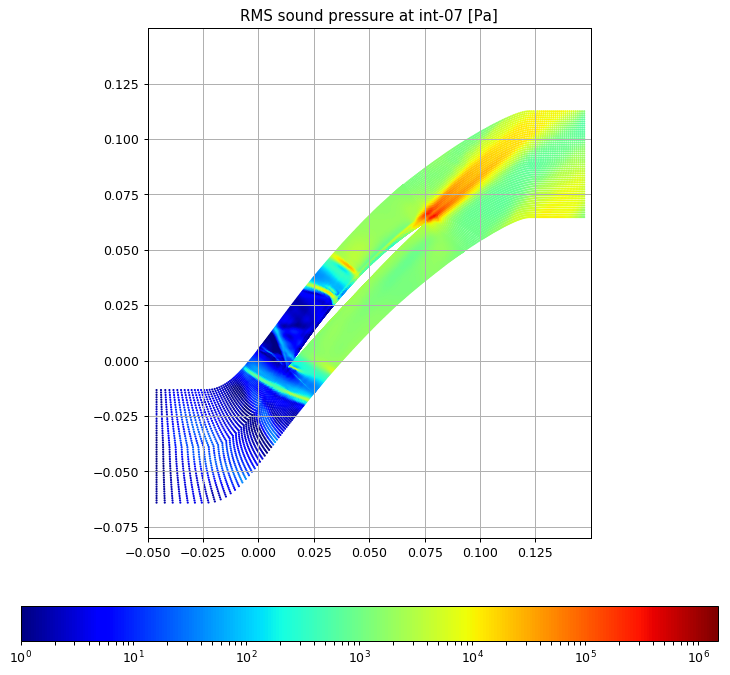

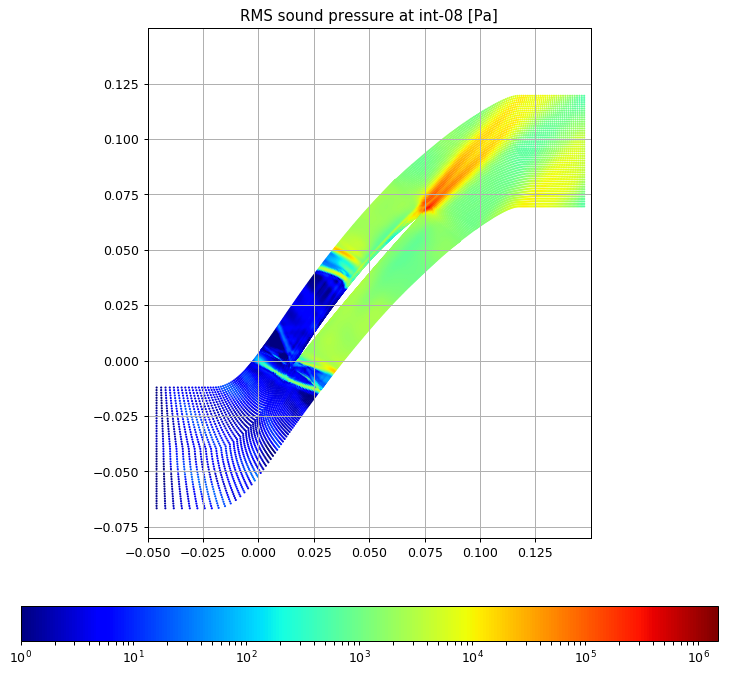

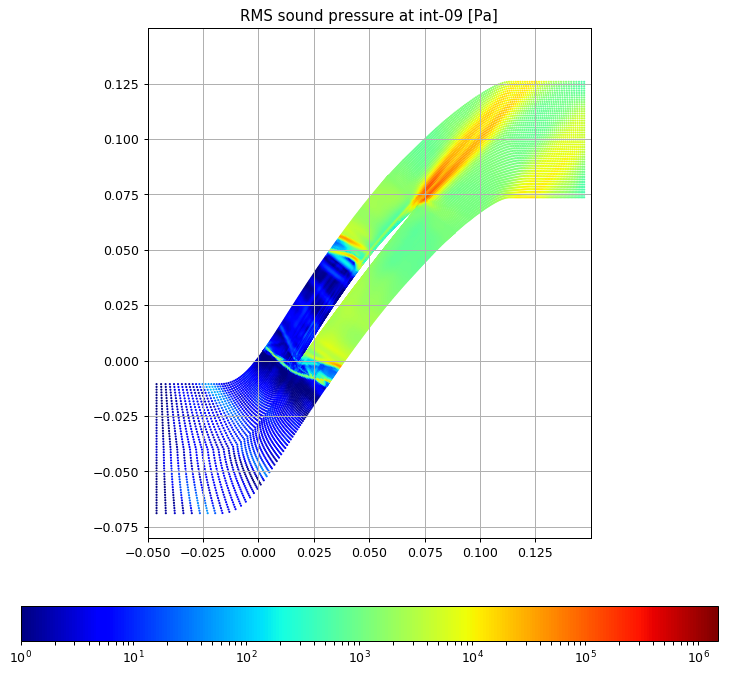

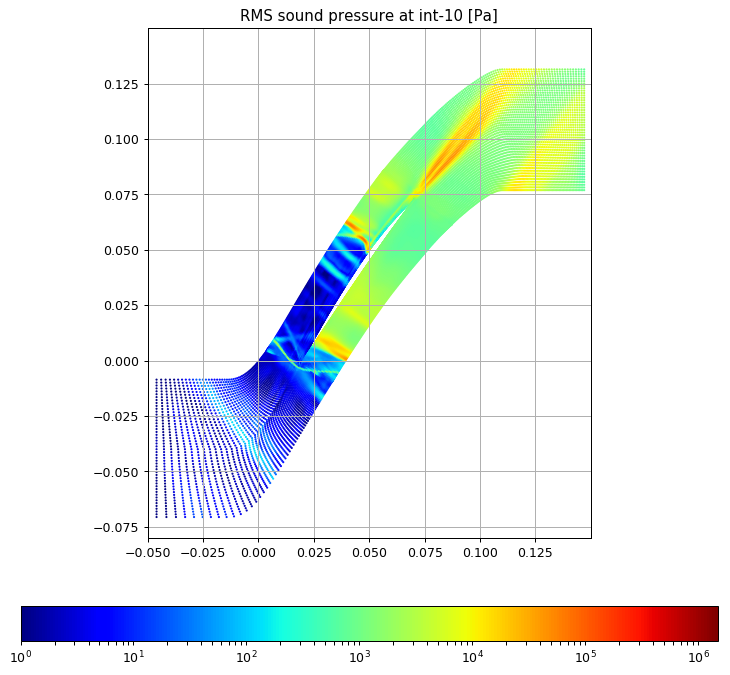

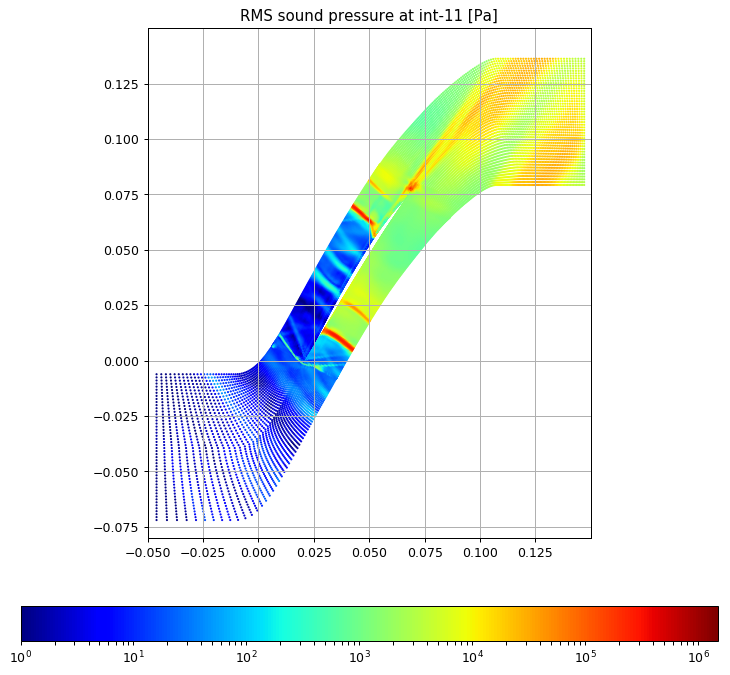

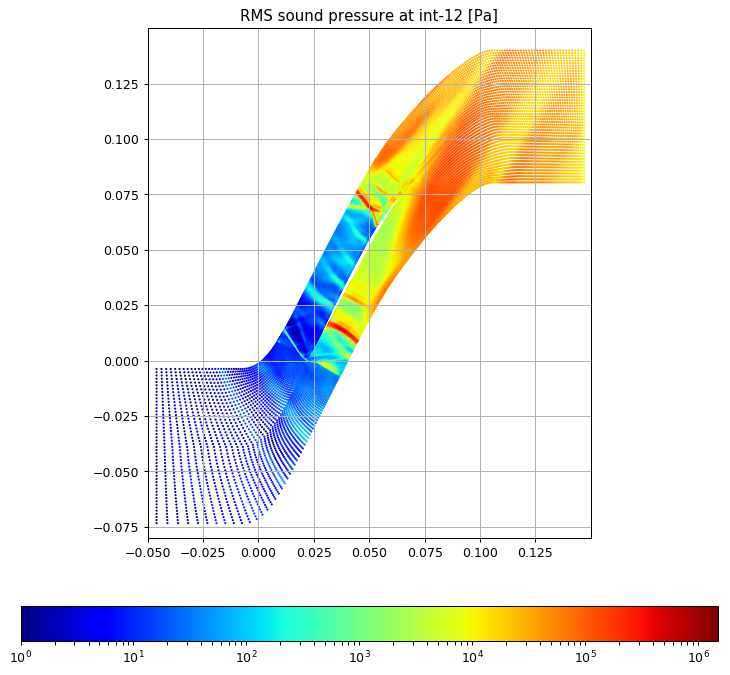

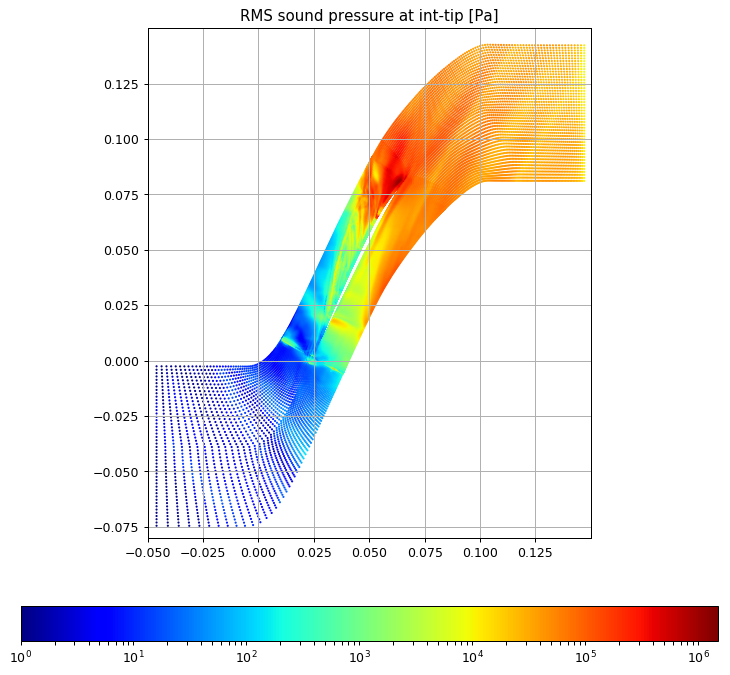

Exiting plotting loop...


In [6]:
i = 0
while i < 13:
    os.chdir(path_coords)
    location = str(os.path.basename(str(coordlist[i])))[:-11]
        
    coords = pd.DataFrame(pd.read_csv(coordlist[i], delimiter=",", header=0, skiprows=0, decimal='.')).set_index('nodenumber')
    x = coords['x-coordinate']
    y = coords['y-coordinate']
    z = coords['z-coordinate']
    
    os.chdir(path_rms)
    data = pd.DataFrame(pd.read_csv(rmslist[i], delimiter=",", header=0, skiprows=0, decimal='.')).set_index('nodenumber')
    spl = data['sound-pressure']
    spl_db = data['rms_spldb']
    spl_min = spl.min()
    spl_max = spl.max()

    sound_pressure_plot = plt.figure(figsize=(10, 10), dpi=90)
    #spl_plot = ax0.scatter(z, x, c=spl, s=0.5, cmap=plt.cm.jet, norm=colors.SymLogNorm(linthresh=0.25*spl_max, linscale=0.25*spl_max, vmin=spl_min, vmax=spl_max))
    ax0 = sound_pressure_plot.gca()
    spl_plot = ax0.scatter(z, x, c=spl, s=0.5, cmap=plt.cm.jet, norm=colors.LogNorm(vmin=1, vmax=1.5e06, clip=False))
    sound_pressure_plot.colorbar(spl_plot, ax=ax0, orientation="horizontal", pad=0.1)
    ax0.set_title(str('RMS sound pressure at ' + str(location) + ' [Pa]'))
    ax0.set_aspect('equal', 'box')
    ax0.set_xlim(-0.05, 0.150)
    ax0.set_ylim(-0.08, 0.150)
    ax0.set_xticks(np.arange(-0.05, 0.150, 0.025))
    ax0.set_yticks(np.arange(-0.075, 0.150, 0.025))
    plt.grid()
    plt.show()
    #os.chdir(path_plots)
    #plt.savefig(str('int-tip_spl_t_' + str(timestep) + '.png'))
    #plt.close()
    
    i = i+1
print("Exiting plotting loop...")

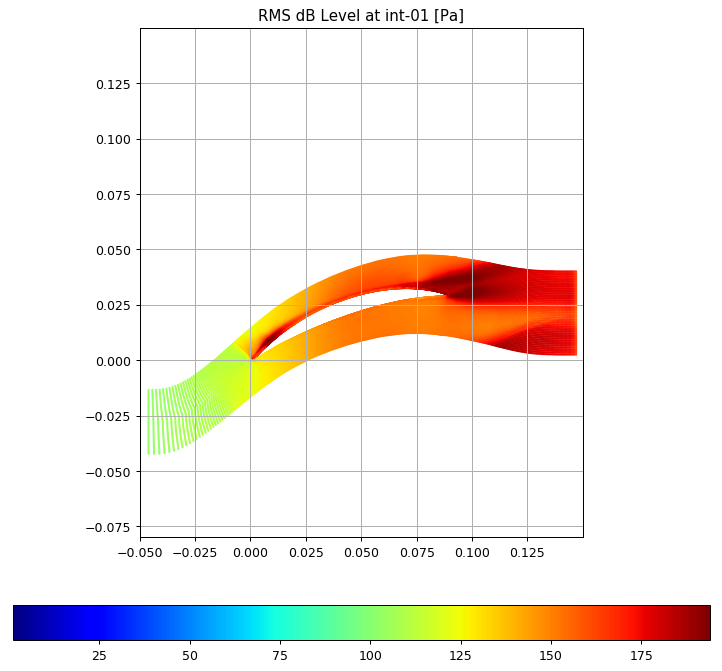

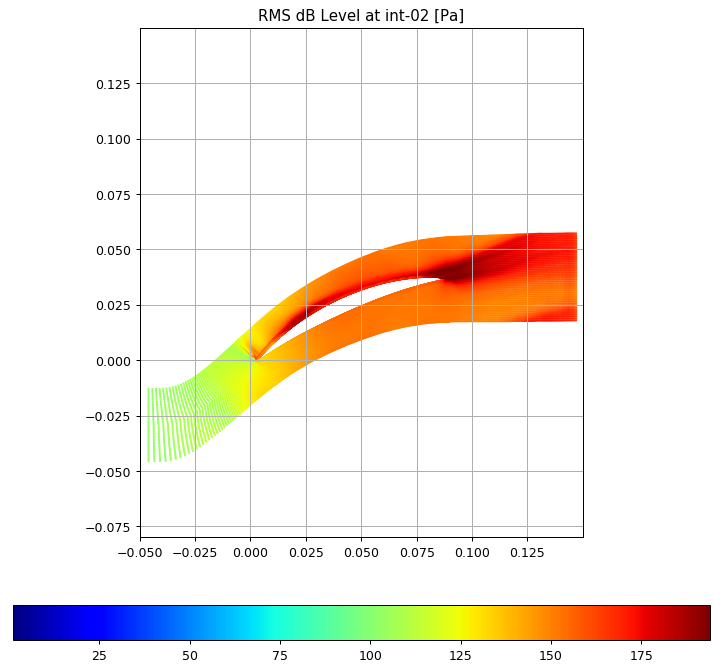

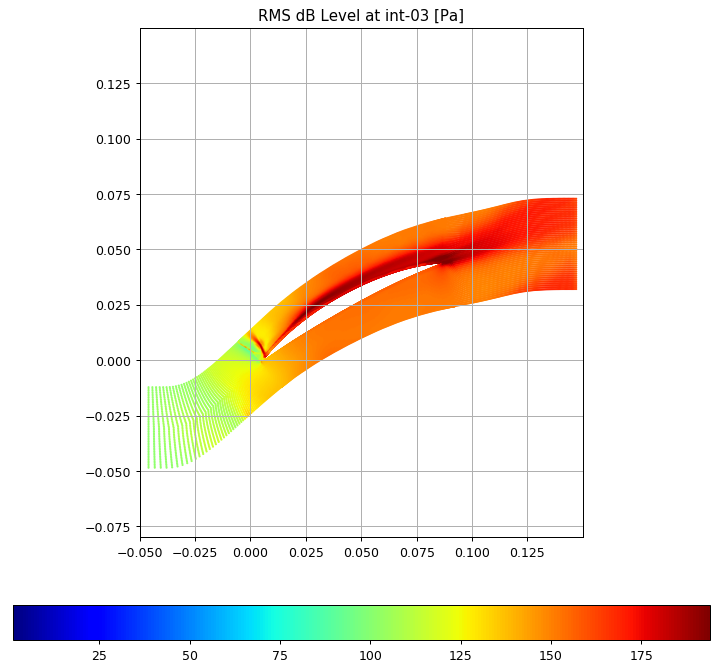

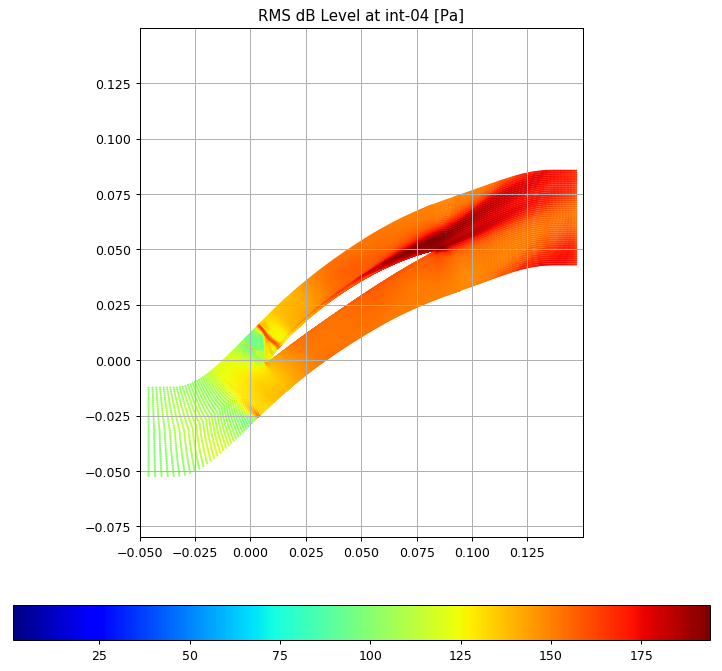

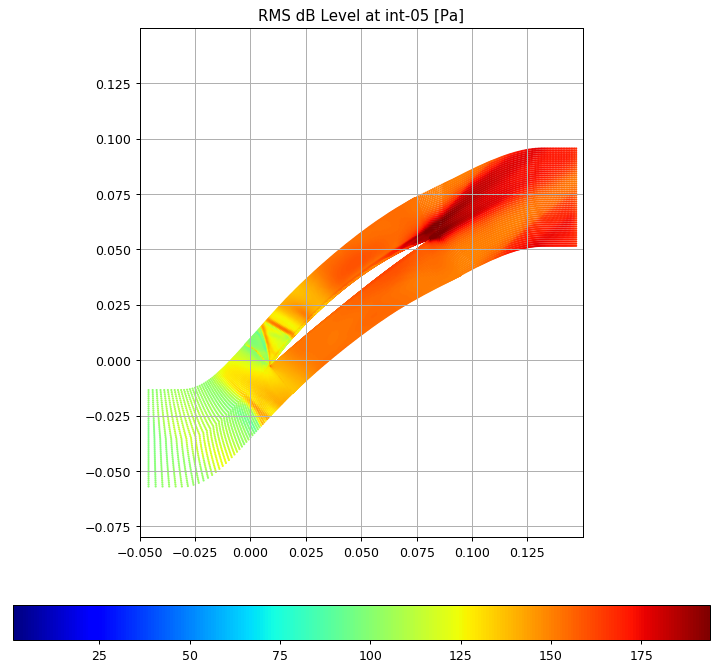

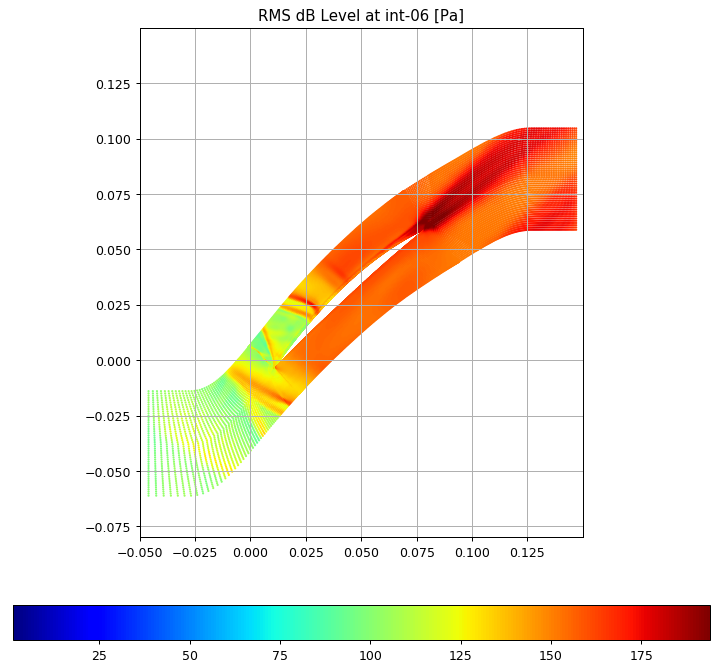

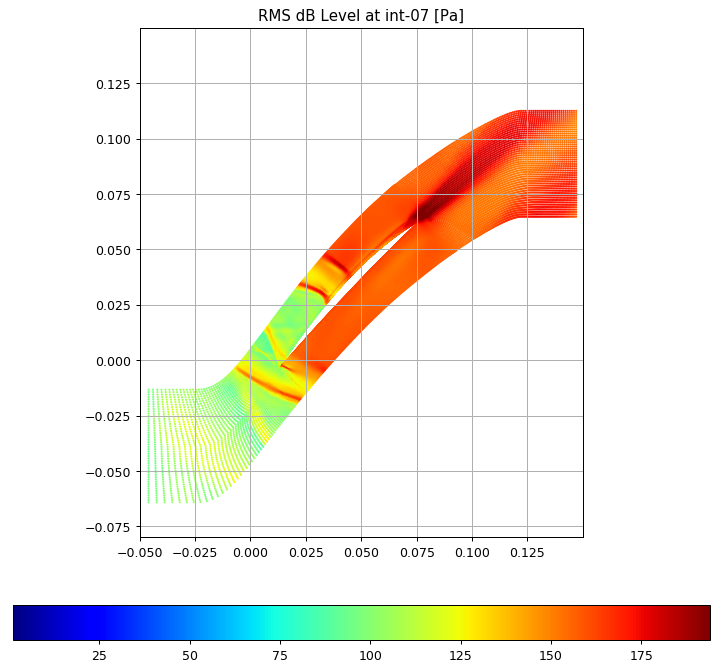

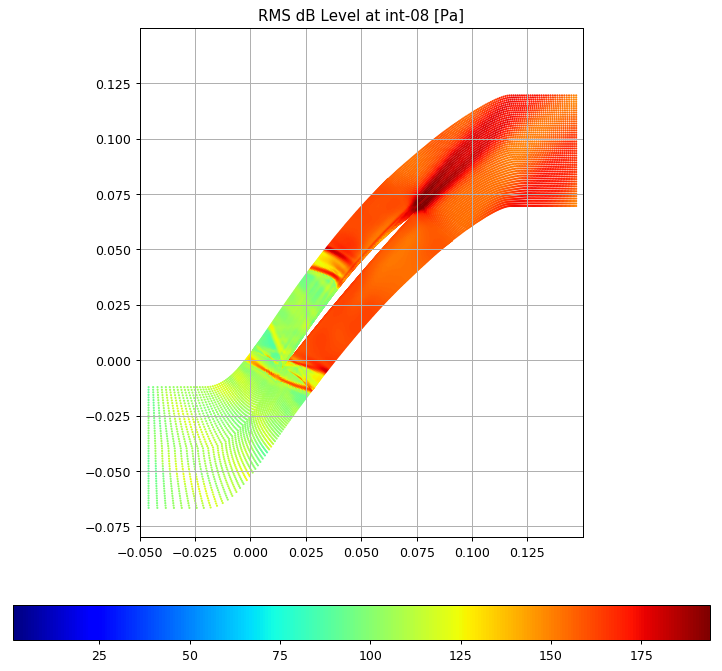

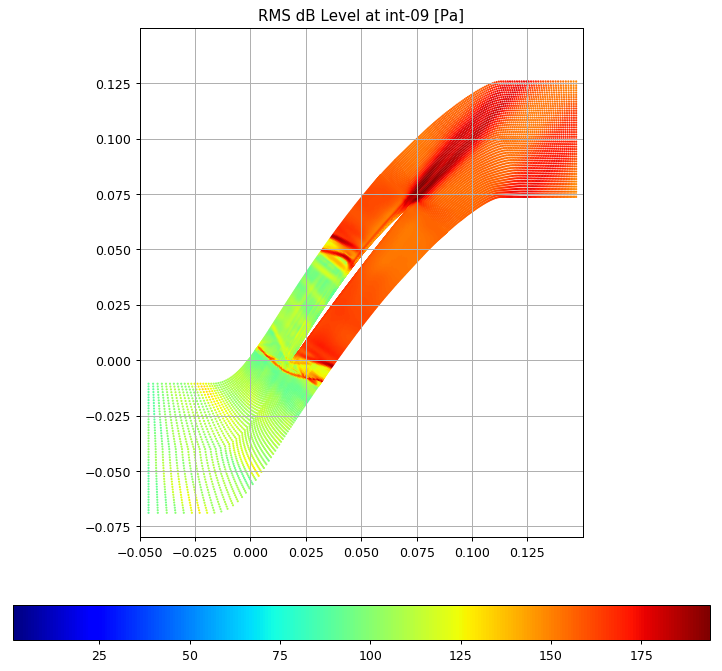

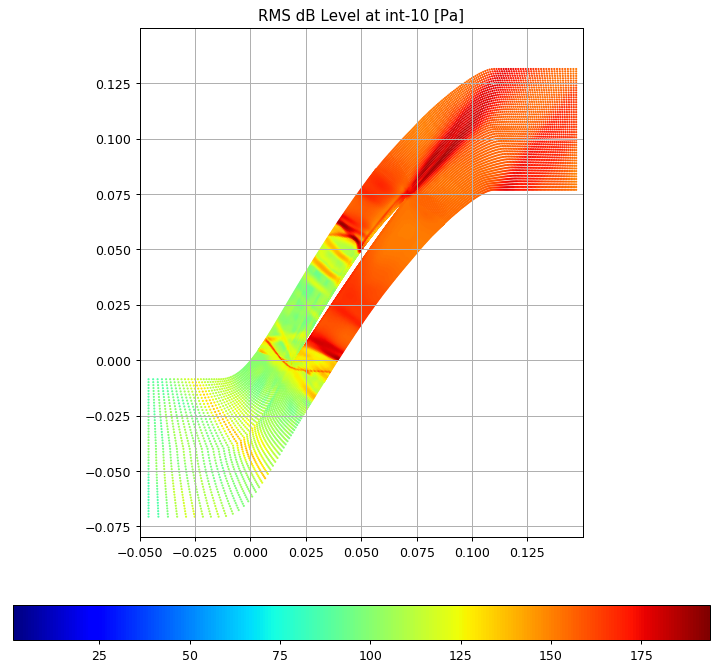

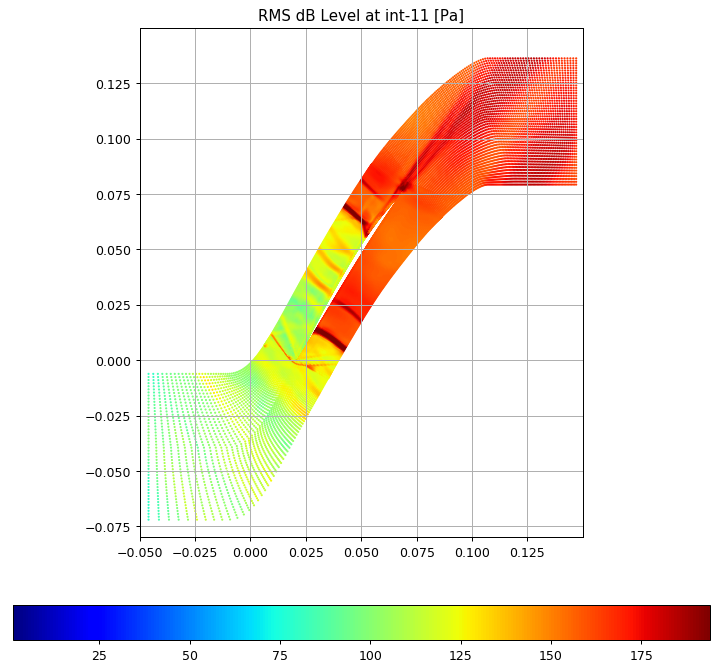

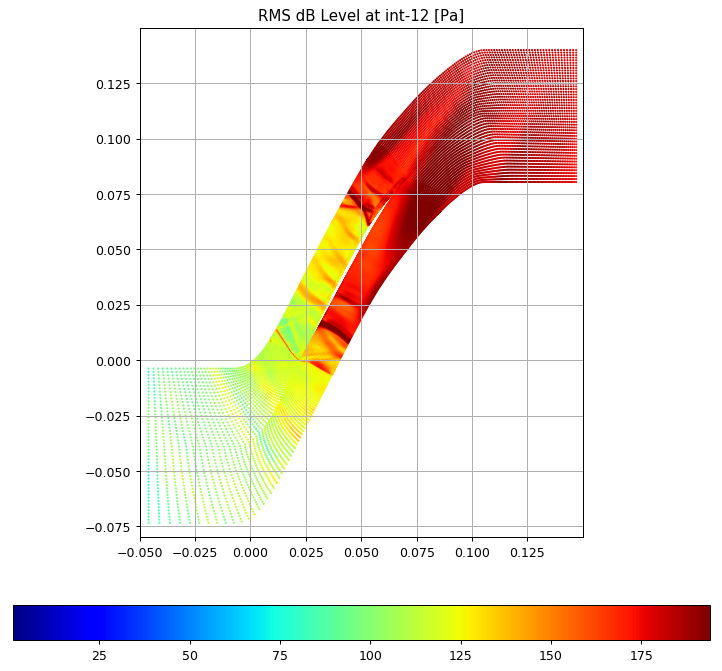

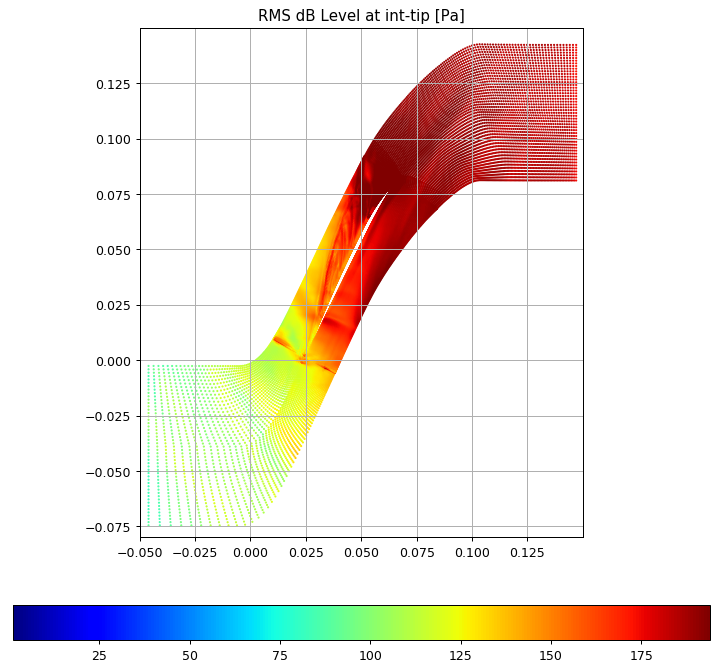

Exiting plotting loop...


In [7]:
i = 0
while i < 13:
    os.chdir(path_coords)
    location = str(os.path.basename(str(coordlist[i])))[:-11]
        
    coords = pd.DataFrame(pd.read_csv(coordlist[i], delimiter=",", header=0, skiprows=0, decimal='.')).set_index('nodenumber')
    x = coords['x-coordinate']
    y = coords['y-coordinate']
    z = coords['z-coordinate']
    
    os.chdir(path_rms)
    data = pd.DataFrame(pd.read_csv(rmslist[i], delimiter=",", header=0, skiprows=0, decimal='.')).set_index('nodenumber')
    spl = data['sound-pressure']
    spl_db = data['rms_spldb']
    spl_min = spl.min()
    spl_max = spl.max()

    sound_intensity_plot = plt.figure(figsize=(10, 10), dpi=90)
    #spl_plot = ax0.scatter(z, x, c=spl, s=0.5, cmap=plt.cm.jet, norm=colors.SymLogNorm(linthresh=0.25*spl_max, linscale=0.25*spl_max, vmin=spl_min, vmax=spl_max))
    ax0 = sound_intensity_plot.gca()
    spldb_plot = ax0.scatter(z, x, c=spl_db, s=0.5, cmap=plt.cm.jet, vmin=1, vmax=194)
    sound_intensity_plot.colorbar(spldb_plot, ax=ax0, orientation="horizontal", pad=0.1)
    ax0.set_title(str('RMS dB Level at ' + str(location) + ' [Pa]'))
    ax0.set_aspect('equal', 'box')
    ax0.set_xlim(-0.05, 0.150)
    ax0.set_ylim(-0.08, 0.150)
    ax0.set_xticks(np.arange(-0.05, 0.150, 0.025))
    ax0.set_yticks(np.arange(-0.075, 0.150, 0.025))
    plt.grid()
    plt.show()
    #os.chdir(path_plots)
    #plt.savefig(str('int-tip_spl_t_' + str(timestep) + '.png'))
    #plt.close()
    
    i = i+1
print("Exiting plotting loop...")

In [ ]:
i = 0
while i < 13:
    os.chdir(path_coords)
    location = str(os.path.basename(str(coordlist[i])))[:-11]
        
    coords = pd.DataFrame(pd.read_csv(coordlist[i], delimiter=",", header=0, skiprows=0, decimal='.')).set_index('nodenumber')
    x = coords['x-coordinate']
    y = coords['y-coordinate']
    z = coords['z-coordinate']
    
    os.chdir(path_rms)
    data = pd.DataFrame(pd.read_csv(rmslist[i], delimiter=",", header=0, skiprows=0, decimal='.')).set_index('nodenumber')
    spl = data['sound-pressure']
    spl_db = data['rms_spldb']
    spl_min = spl.min()
    spl_max = spl.max()
    sil = data['sound-intensity']
    sil_db = data['rms_sildb']
    sil_min = sil.min()
    sil_max = sil.max()

    intensity, (ax0, ax1) = plt.subplots(nrows=2, figsize=(10, 10), dpi=90)
    #sil_plot = ax0.scatter(z, x, c=spl, s=0.5, cmap=plt.cm.jet, norm=colors.SymLogNorm(linthresh=0.1*sil_max, linscale=0.1*sil_max, vmin=sil_min, vmax=sil_max))
    sil_plot = ax0.scatter(z, x, c=sil, s=0.5, cmap=plt.cm.jet, norm=colors.LogNorm(vmin=1, vmax=None, clip=False))
    intensity.colorbar(sil_plot, ax=ax0)
    ax0.set_title(str('RMS sound intensity at ' + str(location) + ' [W/m2]'))
    sildb_plot = ax1.scatter(z, x, c=sil_db, s=0.5, vmin=0, vmax=None, cmap=plt.cm.jet)
    intensity.colorbar(sildb_plot, ax=ax1)
    ax1.set_title(str('RMS SILdB at ' + str(location) + ' [dB]'))
    plt.show()
    #os.chdir(path_plots)
    #plt.savefig(str('int-tip_sil_t_' + str(timestep) + '.png'))
    #plt.close()
    i = i+1
    #print(str(str(timestep) + ' done...'))
print("Exiting plotting loop...")

In [ ]:
i = 14
while i < 15:
    os.chdir(path_coords)
    location = str(os.path.basename(str(coordlist[i])))[:-11]
        
    coords = pd.DataFrame(pd.read_csv(coordlist[i], delimiter=",", header=0, skiprows=0, decimal='.')).set_index('nodenumber')
    x = coords['x-coordinate']
    y = coords['y-coordinate']
    z = coords['z-coordinate']
    
    os.chdir(path_rms)
    data = pd.DataFrame(pd.read_csv(rmslist[i], delimiter=",", header=0, skiprows=0, decimal='.')).set_index('nodenumber')
    spl = data['sound-pressure']
    spl_db = data['rms_spldb']
    spl_min = spl.min()
    spl_max = spl.max()
    '''    
    sil = data['sound-intensity']
    sil_db = data['rms_sildb']
    sil_min = sil.min()
    sil_max = sil.max()
    '''

    pressure, (ax0, ax1) = plt.subplots(nrows=2, figsize=(3.5, 10), dpi=90)
    #spl_plot = ax0.scatter(z, y, c=spl, s=0.5, cmap=plt.cm.jet, norm=colors.SymLogNorm(linthresh=0.25*spl_max, linscale=0.25*spl_max, vmin=spl_min, vmax=spl_max))
    spl_plot = ax0.scatter(-z, y, c=spl, s=0.5, cmap=plt.cm.jet, norm=colors.LogNorm(vmin=1, vmax=None, clip=False))
    pressure.colorbar(spl_plot, ax=ax0)
    ax0.set_title(str('RMS sound pressure at ' + str(location) + ' [Pa]'))
    spldb_plot = ax1.scatter(-z, y, c=spl_db, s=0.5, vmin=0, vmax=None, cmap=plt.cm.jet)
    pressure.colorbar(spldb_plot, ax=ax1)
    ax1.set_title(str('RMS SPLdB at ' + str(location) + ' [dB]'))
    plt.show()
    #os.chdir(path_plots)
    #plt.savefig(str('int-tip_spl_t_' + str(timestep) + '.png'))
    #plt.close()
    '''
    intensity, (ax0, ax1) = plt.subplots(nrows=2, figsize=(10, 10), dpi=90)
    #sil_plot = ax0.scatter(z, y, c=spl, s=0.5, cmap=plt.cm.jet, norm=colors.SymLogNorm(linthresh=0.1*sil_max, linscale=0.1*sil_max, vmin=sil_min, vmax=sil_max))
    sil_plot = ax0.scatter(z, y, c=sil, s=0.5, cmap=plt.cm.jet, norm=colors.LogNorm(vmin=1, vmax=15000, clip=False))
    intensity.colorbar(sil_plot, ax=ax0)
    ax0.set_title(str('RMS sound intensity at ' + str(location) + ' [W/m2]'))
    sildb_plot = ax1.scatter(z, y, c=sil_db, s=0.5, vmin=0, vmax=None, cmap=plt.cm.jet)
    intensity.colorbar(sildb_plot, ax=ax1)
    ax1.set_title(str('RMS SILdB at ' + str(location) + ' [dB]'))
    plt.show()
    #os.chdir(path_plots)
    #plt.savefig(str('int-tip_sil_t_' + str(timestep) + '.png'))
    #plt.close()
    '''
    i = i+1
    #print(str(str(timestep) + ' done...'))

print("Exiting plotting loop...")


In [ ]:
i = 15
while i < 16:
    os.chdir(path_coords)
    location = str(os.path.basename(str(coordlist[i])))[:-11]
        
    coords = pd.DataFrame(pd.read_csv(coordlist[i], delimiter=",", header=0, skiprows=0, decimal='.')).set_index('nodenumber')
    x = coords['x-coordinate']
    y = coords['y-coordinate']
    z = coords['z-coordinate']
    
    os.chdir(path_rms)
    data = pd.DataFrame(pd.read_csv(rmslist[i], delimiter=",", header=0, skiprows=0, decimal='.')).set_index('nodenumber')
    spl = data['sound-pressure']
    spl_db = data['rms_spldb']
    spl_min = spl.min()
    spl_max = spl.max()
    '''    
    sil = data['sound-intensity']
    sil_db = data['rms_sildb']
    sil_min = sil.min()
    sil_max = sil.max()
    '''

    pressure, (ax0, ax1) = plt.subplots(nrows=2, figsize=(3.5, 10), dpi=90)
    #spl_plot = ax0.scatter(z, y, c=spl, s=0.5, cmap=plt.cm.jet, norm=colors.SymLogNorm(linthresh=0.25*spl_max, linscale=0.25*spl_max, vmin=spl_min, vmax=spl_max))
    spl_plot = ax0.scatter(z, y, c=spl, s=0.5, cmap=plt.cm.jet, norm=colors.LogNorm(vmin=1, vmax=100000, clip=False))
    pressure.colorbar(spl_plot, ax=ax0)
    ax0.set_title(str('RMS sound pressure at ' + str(location) + ' [Pa]'))
    spldb_plot = ax1.scatter(z, y, c=spl_db, s=0.5, vmin=0, vmax=None, cmap=plt.cm.jet)
    pressure.colorbar(spldb_plot, ax=ax1)
    ax1.set_title(str('RMS SPLdB at ' + str(location) + ' [dB]'))
    plt.show()
    #os.chdir(path_plots)
    #plt.savefig(str('int-tip_spl_t_' + str(timestep) + '.png'))
    #plt.close()
    '''
    intensity, (ax0, ax1) = plt.subplots(nrows=2, figsize=(10, 10), dpi=90)
    #sil_plot = ax0.scatter(z, y, c=spl, s=0.5, cmap=plt.cm.jet, norm=colors.SymLogNorm(linthresh=0.1*sil_max, linscale=0.1*sil_max, vmin=sil_min, vmax=sil_max))
    sil_plot = ax0.scatter(z, y, c=sil, s=0.5, cmap=plt.cm.jet, norm=colors.LogNorm(vmin=1, vmax=15000, clip=False))
    intensity.colorbar(sil_plot, ax=ax0)
    ax0.set_title(str('RMS sound intensity at ' + str(location) + ' [W/m2]'))
    sildb_plot = ax1.scatter(z, y, c=sil_db, s=0.5, vmin=0, vmax=None, cmap=plt.cm.jet)
    intensity.colorbar(sildb_plot, ax=ax1)
    ax1.set_title(str('RMS SILdB at ' + str(location) + ' [dB]'))
    plt.show()
    #os.chdir(path_plots)
    #plt.savefig(str('int-tip_sil_t_' + str(timestep) + '.png'))
    #plt.close()
    '''
    i = i+1
    #print(str(str(timestep) + ' done...'))

print("Exiting plotting loop...")


In [ ]:
for file in rmslist:
    data = pd.DataFrame(pd.read_csv(file, delimiter=",", header=0, skiprows=0, decimal='.')).set_index('nodenumber')

    spl = data['sound-pressure']
    print(spl.max()) 